# Demonstrating the Gini Coefficient:
## Spatial Inequality in Mexico: 1940-2000

1. Imports & Input Data
2. Classic Gini Coefficient
3. Spatial Gini Coefficient

-------------------------

### 1. Imports & Input Data

In [1]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

Last updated: 2023-01-16T21:00:59.129990-05:00

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.8.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [2]:
import geopandas
import inequality
import libpysal
import matplotlib.pyplot as plt
import numpy

In [3]:
%watermark -w
%watermark -iv

Watermark: 2.3.1

libpysal  : 4.7.0
inequality: 1.0.0+28.g078a825.dirty
matplotlib: 3.6.2
numpy     : 1.24.1
json      : 2.0.9
geopandas : 0.12.2



In [4]:
libpysal.examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [5]:
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

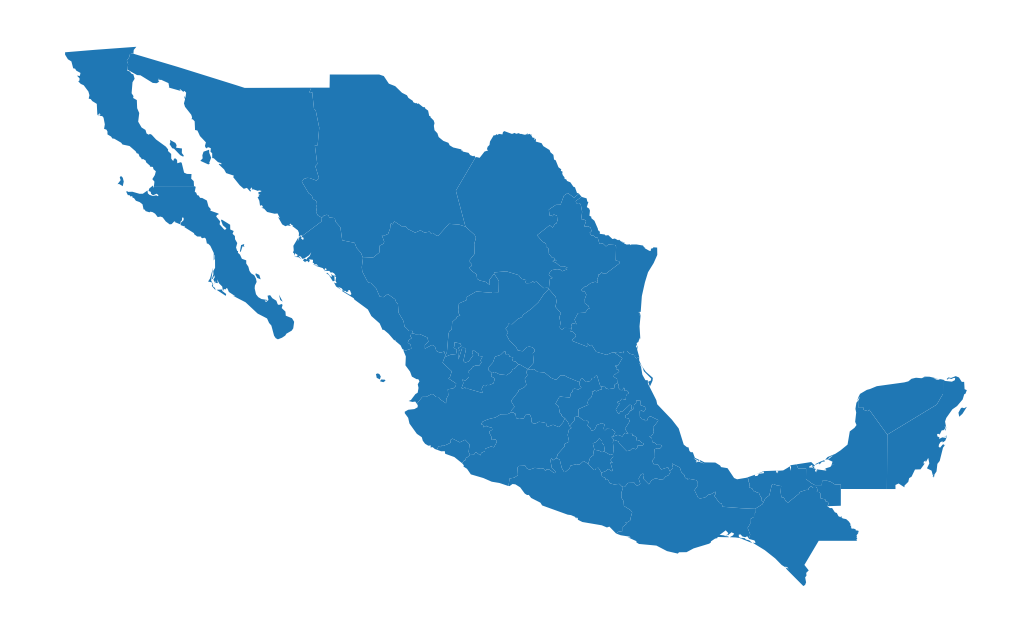

In [6]:
ax = gdf.plot()
ax.set_axis_off()

In [7]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


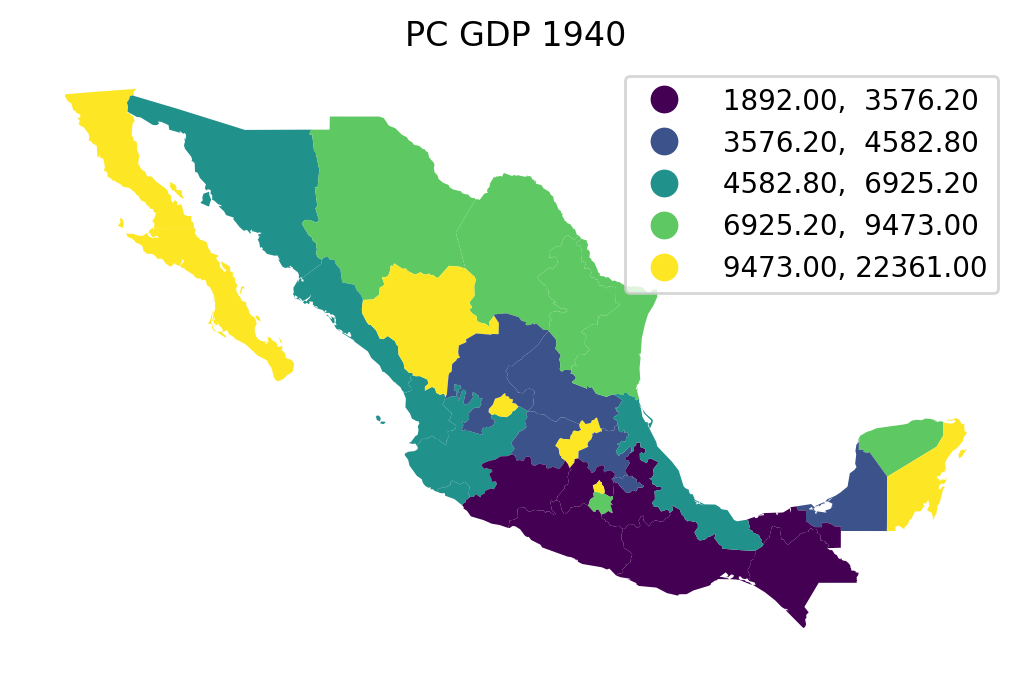

In [8]:
ax = gdf.plot(column="PCGDP1940", k=5, scheme="Quantiles", legend=True)
ax.set_axis_off()
ax.set_title("PC GDP 1940");
# plt.savefig("1940.png")

------------------------------------------------

### 2. Classic Gini Coefficient

In [9]:
gini_1940 = inequality.gini.Gini(gdf["PCGDP1940"])
gini_1940.g

0.3537237117345285

In [10]:
decades = range(1940, 2010, 10)
decades

range(1940, 2010, 10)

In [11]:
ginis = [inequality.gini.Gini(gdf["PCGDP%s" % decade]).g for decade in decades]
ginis

[0.3537237117345285,
 0.29644613439022827,
 0.2537183285655905,
 0.25513356494927303,
 0.24505338049421577,
 0.25181825879538217,
 0.2581130824882791]

--------------------------------------

### 3. Spatial Gini Coefficient

In [12]:
inequality.gini.Gini_Spatial

inequality.gini.Gini_Spatial

In [13]:
regimes = gdf["HANSON98"]

In [14]:
w = libpysal.weights.block_weights(regimes, silence_warnings=True)
w

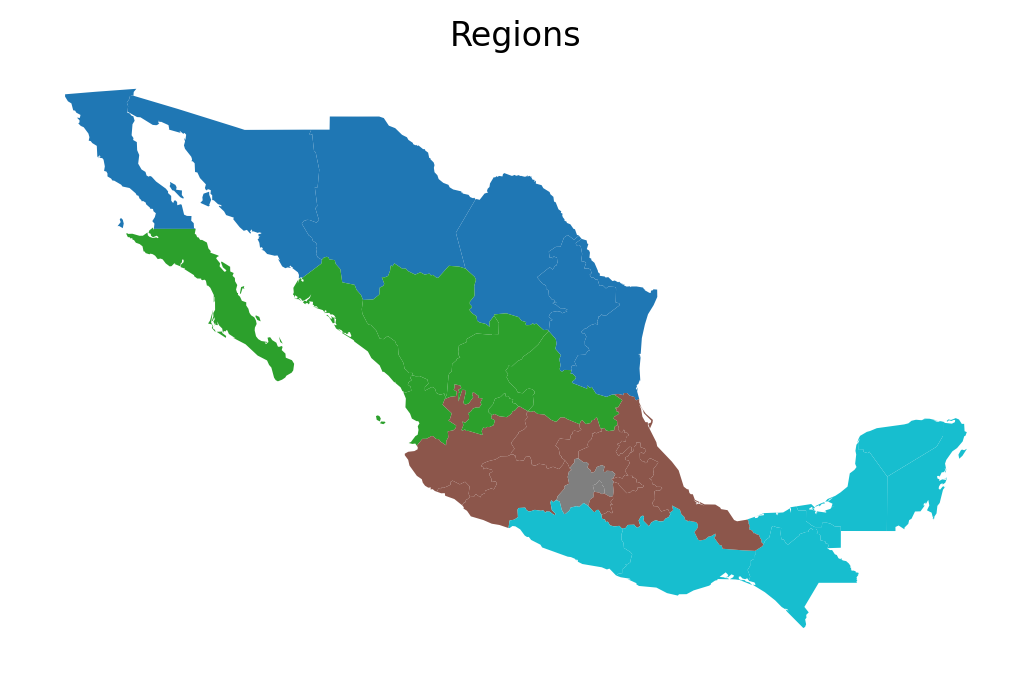

In [15]:
ax = gdf.plot(column="HANSON98", categorical=True)
ax.set_title("Regions")
ax.set_axis_off()
# plt.savefig("regions.png")

In [16]:
numpy.random.seed(12345)
gs = inequality.gini.Gini_Spatial(gdf["PCGDP1940"], w)
gs.p_sim

0.01

In [17]:
gs_all = [
    inequality.gini.Gini_Spatial(gdf["PCGDP%s" % decade], w) for decade in decades
]

In [18]:
p_values = [gs.p_sim for gs in gs_all]
p_values

[0.04, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01]

In [19]:
wgs = [gs.wcg_share for gs in gs_all]
wgs

[0.2940179879590452,
 0.24885041274552472,
 0.21715641601961586,
 0.2212882581200239,
 0.20702733316567423,
 0.21270360014540865,
 0.2190953550725723]

In [20]:
bgs = [1 - wg for wg in wgs]
bgs

[0.7059820120409548,
 0.7511495872544753,
 0.7828435839803841,
 0.778711741879976,
 0.7929726668343258,
 0.7872963998545913,
 0.7809046449274277]

In [21]:
years = numpy.array(decades)
years

array([1940, 1950, 1960, 1970, 1980, 1990, 2000])

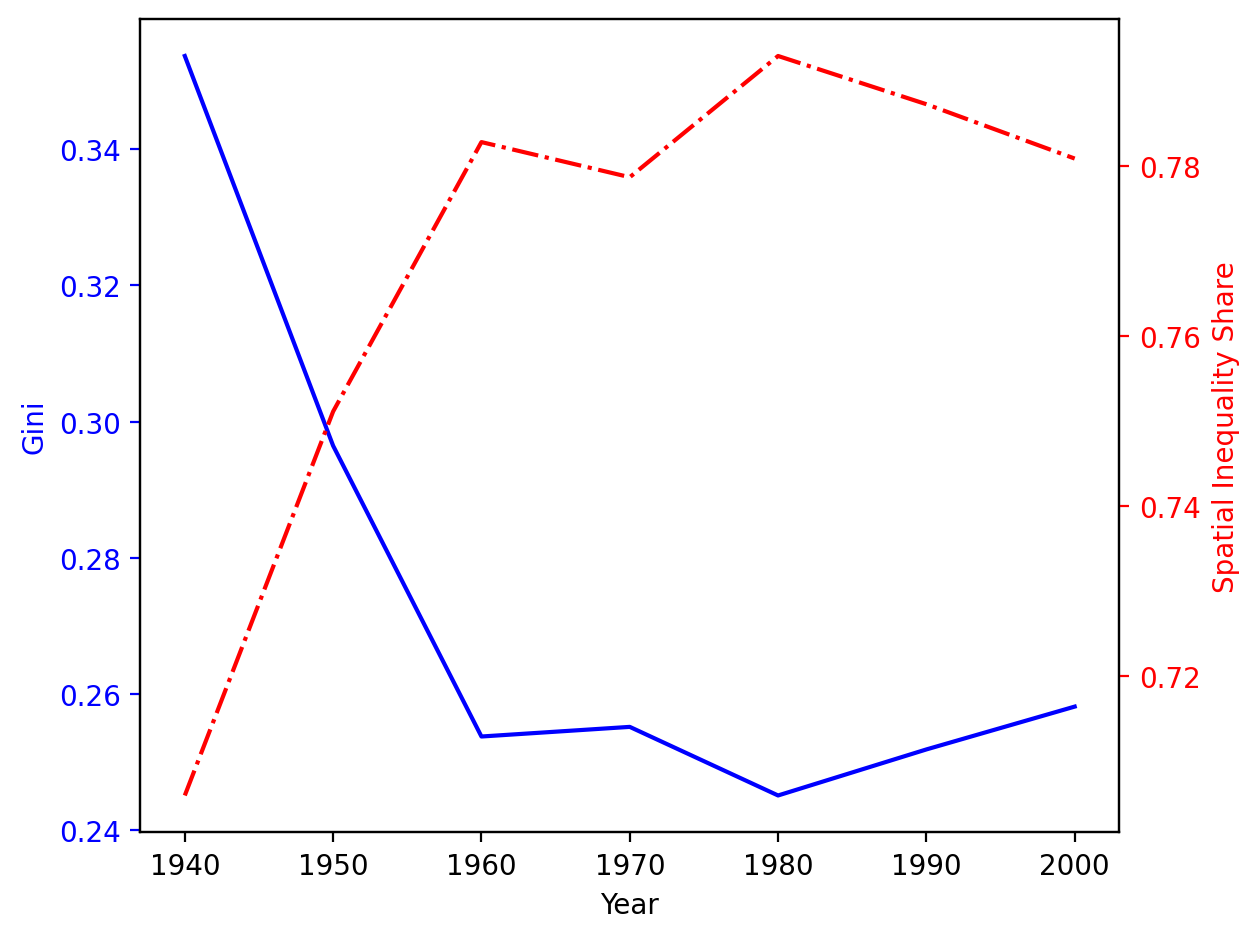

In [22]:
fig, ax1 = plt.subplots()
t = years
s1 = ginis
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Year")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel("Gini", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
s2 = bgs
ax2.plot(t, s2, "r-.")
ax2.set_ylabel("Spatial Inequality Share", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()

# plt.savefig("share.png")

-----------------------